<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_ML_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import minmax_scale

#Salaries DataSet

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
data=pd.read_csv("Salaries.csv")
print(data)
type(data)

     work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee

pandas.core.frame.DataFrame

In [ ]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
data.shape

(607, 11)

In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


<ipython-input-11-c0fb2fe747fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")


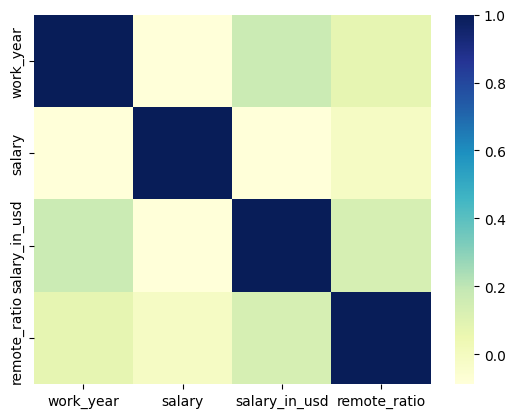

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

###Converting Categorical data into numerical data

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column.
data['experience_level']= label_encoder.fit_transform(data['experience_level'])
data['employment_type']= label_encoder.fit_transform(data['employment_type'])
data['job_title']= label_encoder.fit_transform(data['job_title'])
data['salary_currency']= label_encoder.fit_transform(data['salary_currency'])
data['employee_residence']= label_encoder.fit_transform(data['employee_residence'])
data['company_location']= label_encoder.fit_transform(data['company_location'])

###Splitting the data set into X and Y where X contains the values of all the rows except the target column and Y contains the value of only the target column

In [ ]:
X = data.drop(['company_size'], axis=1)
y= data.company_size

In [ ]:
X1 = X[['experience_level','employment_type']]
print(X1)

     experience_level  employment_type
0                   2                2
1                   3                2
2                   3                2
3                   2                2
4                   3                2
..                ...              ...
602                 3                2
603                 3                2
604                 3                2
605                 3                2
606                 2                2

[607 rows x 2 columns]


###Using Decision Tree Algorithm

In [ ]:
clf = DecisionTreeClassifier()
clf1 = clf.fit(X, y)
clf2 = clf.fit(X1, y)

###Drawing the decision tree

[Text(0.609375, 0.9285714285714286, 'x[0] <= 2.5\ngini = 0.586\nsamples = 607\nvalue = [198, 326, 83]'),
 Text(0.34375, 0.7857142857142857, 'x[0] <= 0.5\ngini = 0.633\nsamples = 327\nvalue = [126, 140, 61]'),
 Text(0.1875, 0.6428571428571429, 'x[1] <= 2.5\ngini = 0.667\nsamples = 88\nvalue = [29, 30, 29]'),
 Text(0.125, 0.5, 'x[1] <= 1.0\ngini = 0.665\nsamples = 81\nvalue = [29, 27, 25]'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.1875, 0.35714285714285715, 'gini = 0.666\nsamples = 79\nvalue = [28, 26, 25]'),
 Text(0.25, 0.5, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.5, 0.6428571428571429, 'x[1] <= 0.5\ngini = 0.606\nsamples = 239\nvalue = [97, 110, 32]'),
 Text(0.375, 0.5, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4375, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.625, 0.5, 'x[1] <= 2.5\

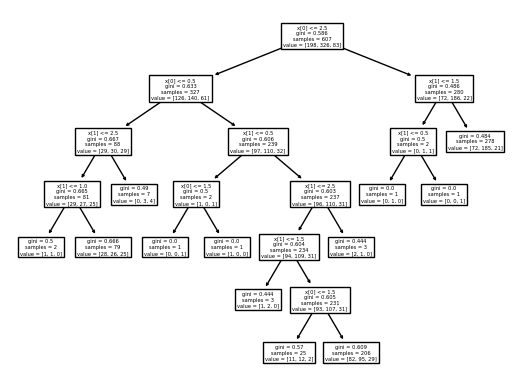

In [ ]:
from sklearn import tree
tree.plot_tree(clf1)

[Text(0.609375, 0.9285714285714286, 'x[0] <= 2.5\ngini = 0.586\nsamples = 607\nvalue = [198, 326, 83]'),
 Text(0.34375, 0.7857142857142857, 'x[0] <= 0.5\ngini = 0.633\nsamples = 327\nvalue = [126, 140, 61]'),
 Text(0.1875, 0.6428571428571429, 'x[1] <= 2.5\ngini = 0.667\nsamples = 88\nvalue = [29, 30, 29]'),
 Text(0.125, 0.5, 'x[1] <= 1.0\ngini = 0.665\nsamples = 81\nvalue = [29, 27, 25]'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.1875, 0.35714285714285715, 'gini = 0.666\nsamples = 79\nvalue = [28, 26, 25]'),
 Text(0.25, 0.5, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.5, 0.6428571428571429, 'x[1] <= 0.5\ngini = 0.606\nsamples = 239\nvalue = [97, 110, 32]'),
 Text(0.375, 0.5, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4375, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.625, 0.5, 'x[1] <= 2.5\

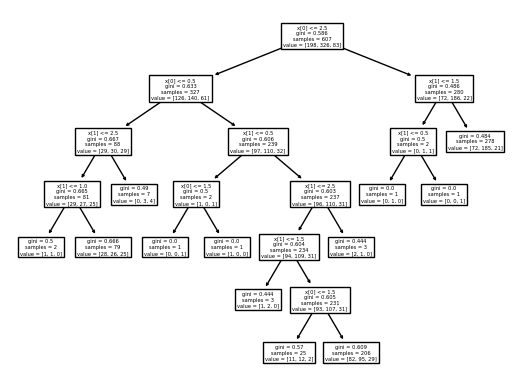

In [ ]:
tree.plot_tree(clf2)

In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(clf1, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the average accuracy across all folds
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [0.18852459 0.66393443 0.68595041 0.56198347 0.54545455]
Average accuracy: 0.5291694892291018


In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(clf2, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the average accuracy across all folds
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [0.18852459 0.64754098 0.70247934 0.56198347 0.57024793]
Average accuracy: 0.5341552635144289


Accuracy on test set: 0.60
Classification Report:
              precision    recall  f1-score   support

           L       0.48      0.48      0.48        60
           M       0.74      0.75      0.74        97
           S       0.33      0.31      0.32        26

    accuracy                           0.60       183
   macro avg       0.52      0.51      0.52       183
weighted avg       0.60      0.60      0.60       183



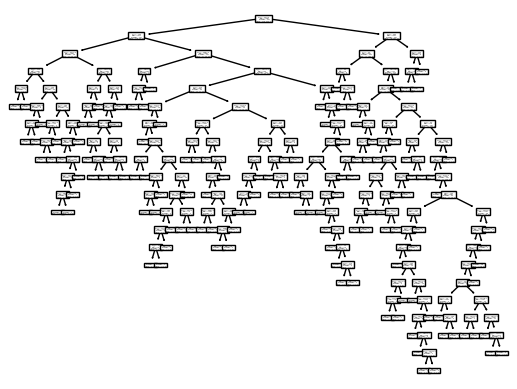

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")
plot_tree(clf)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#Lung Cancer DataSet

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
data=pd.read_csv("cancer patient data sets.csv")
print(data)
type(data)

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1000, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

###Dropping columns index and Patient Id

In [ ]:
data=data.drop(columns=['index','Patient Id'],axis=1)

In [ ]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


<ipython-input-27-c0fb2fe747fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")


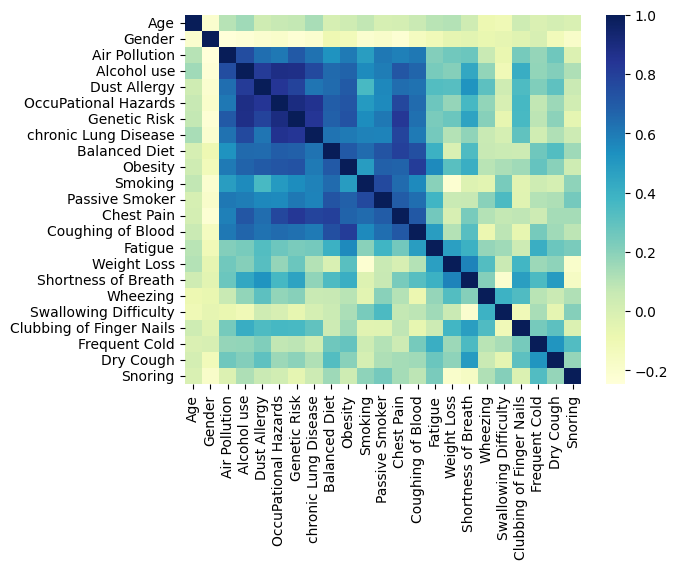

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

###Splitting the data set into X and Y where X contains the values of all the rows except the target column and Y contains the value of only the target column

In [ ]:
X = data.drop(columns=['Level'],axis=1)
y = data['Level']

###Using Decion Tree Algorithm

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

###Visual representation of the decision tree

[Text(0.5, 0.9166666666666666, 'x[13] <= 5.5\ngini = 0.665\nsamples = 1000\nvalue = [365, 303, 332]'),
 Text(0.3333333333333333, 0.75, 'x[17] <= 4.5\ngini = 0.517\nsamples = 585\nvalue = [10, 283, 292]'),
 Text(0.25, 0.5833333333333334, 'x[22] <= 4.5\ngini = 0.357\nsamples = 364\nvalue = [10, 283, 71]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[9] <= 4.5\ngini = 0.177\nsamples = 313\nvalue = [10, 283, 20]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 283\nvalue = [0, 283, 0]'),
 Text(0.25, 0.25, 'x[6] <= 5.5\ngini = 0.444\nsamples = 30\nvalue = [10, 0, 20]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 51\nvalue = [0, 0, 51]'),
 Text(0.4166666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 221\nvalue = [0, 0, 221]'),
 Text(0.6666666666666666, 0

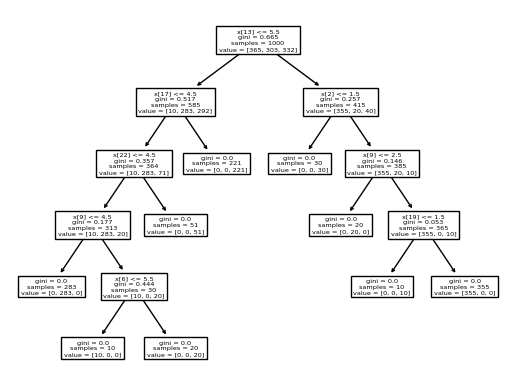

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
clf.get_depth()

5

In [ ]:
clf.get_n_leaves()

9

In [ ]:
clf.score(X, y, sample_weight=None)

1.0

In [ ]:
# Perform cross-validation with 5 folds
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Print the average accuracy across all folds
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Average accuracy: 1.0


Accuracy on test set: 1.00





Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



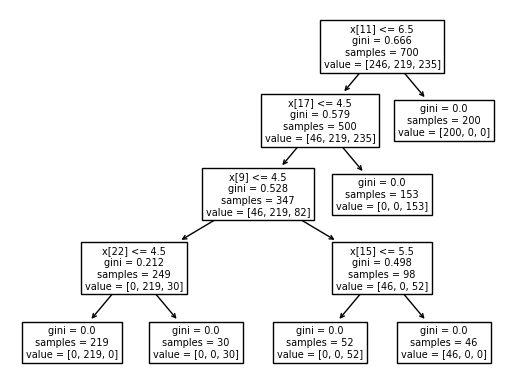

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")

plot_tree(clf)
print("\n\n\n\n")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Own data set - Lungs Cancer

In [ ]:
data1 = pd.read_csv('lungs.csv')
data1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
